# Анализ рынка заведений общественного питания Москвы

## Введение

### Цели и задачи проекта

**Цель проекта** - провести исследовательский анализ рынка заведений общественного питания в Москве на основе данных сервисов Яндекс Карты и Яндекс Бизнес, чтобы выявить ключевые закономерности и дать рекомендации инвесторам по выбору формата и расположения нового заведения.

**Задачи:**

- Ознакомиться с данными - изучить структуру и объём датасетов, проверить корректность данных, выявить пропуски и несоответствия.
- Провести предобработку данных - обработать пропуски, устранить дубликаты, привести данные к нужным типам.
- Исследовать рынок - проанализировать категории заведений, их распределение по административным округам, сетевой статус, количество посадочных мест, ценовые сегменты и рейтинги.
- Изучить взаимосвязи - проверить, какие характеристики сильнее всего коррелируют с рейтингами заведений, визуализировать результаты и сделать выводы.
- Определить популярные сети - выделить топ-15 сетей Москвы, оценить их средние рейтинги и категории.
- Проанализировать ценовой сегмент - изучить распределение среднего чека по районам Москвы и сравнить цены в центральном округе и в других округах.
- Сформулировать выводы и рекомендации, и определить наиболее перспективные направления для открытия нового заведения.

### Описание данных

Для анализа будут использованы данные из датасетов `rest_info` и `rest_price`.

- `rest_info.csv` — информация о заведениях общественного питания;
- `rest_price.csv` — информация о среднем чеке в заведениях общественного питания.

### Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район;
- `category` — категория заведения;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения;
- `chain` — бинарный признак, показывающий, относится ли заведение к сети (0 - несетевое, 1 - сетевое).
- `seats` — количество посадочных мест.

### Описание датасета `rest_price`

- `price` — категория цен в заведении;
- `avg_bill` — средняя стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт».
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино».

### Содержимое проекта

1. Загрузка и знакомство с данными.
   - Загрузка библиотек
   - Знакомство с данными
   - Объединение датафреймов
3. Предобработка данных
   - Приведение типов
   - Подсчет пропусков
   - Работа с дубликатами
4. Исследовательский анализ данных
   - Количество заведений по категориям
   - Распределение заведений по районам
   - Соотношение сетевых и несетевых заведений
   - Распределение по количеству посадочных мест
   - Распределение рейтингов заведений
   - Корреляция рейтинга с другими характеристиками
   - Топ-15 сетей по популярности
   - Анализ среднего чека
5. Итоговый вывод и рекомендации
    - Обзор проделанной работы
    - Главные выводы
    - Рекомендации на основе анализа данных

## 1. Загрузка данных и знакомство с ними

- Загружаем необходимые библиотеки.

In [1]:
# Устанавливаем библиотеку phik.
!pip install phik -U

In [2]:
# Импортируем библиотеки.
import pandas as pd

# Загружаем библиотеки для визуализации данных.
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k.
from phik import phik_matrix

In [3]:
# Выгружаем данные датасетов в переменные rest_info_df и rest_price_df.
rest_info_df = pd.read_csv('https:// ...
rest_price_df = pd.read_csv('https:// ...

- Знакомимся с данными.

In [4]:
# Выводим первые пять строк датафрейма rest_info_df
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме rest_info_df
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


- В датафрейме содержатся `8406` строк и `9` столбцов. Большая часть типов данных в датафрейме соответствуют хранимым значениям. Тем не менее, несмотря на относительно небольшой объём данных, имеет смысл изменить типы столбцов `rating` и `seats` на менее ресурсоёмкие. Тип данных столбца `chain` (`int64`) следует преобразовать в `bool` поскольку столбец хранит в себе бинарный признак.

In [6]:
# Выводим первые пять строк датафрейма rest_price_df
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме rest_price_df
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


- В датафрейме содержатся `4058` строк и `5` столбцов. Столбцы `middle_avg_bill` и `middle_coffee_cup` следует привести к менее ресурсоемкому типу, не смотря на небольшой датасет. Типы столбцов `id`, `price` и `avg_bill` соответствуют хранимым значениям.

### Промежуточный вывод

- В датафрейме `rest_info_df` содержатся `8406` строк и `9` столбцов. Данные соответствуют описанию. Наименования столбцов корректны и соответствуют стилю `snake_case`. Типы данных в целом соответствуют хранимым значениям, однако типы данных столбцов `rating` и `seats` следует привести к менее ресурсоёмким, а тип столбца `chain` к `bool`, поскольку он хранит в себе бинарный признак.

- В датафрейме `rest_price_df` содержатся `4058` строк и `5` столбцов. Данные соответствуют описанию. Наименования столбцов корректны и соответствуют стилю `snake_case`. Типы данных соответствуют хранимым значениям, однако столбцы `middle_avg_bill` и `middle_coffee_cup` (`float64`) следует привести к менее ресурсоёмкому типу. Пропуски присутствуют во всех столбцах, кроме `id`.

### Подготовка единого датафрейма

In [8]:
# Объединяем датафреймы по столбцу id с помощью функции merge, тип соединения - left, чтобы сохранить все заведения из rest_info_df.
df_merged = pd.merge(rest_info_df, rest_price_df, on='id', how='left')

## 2. Предобработка данных

In [9]:
# Создаем переменную для хранения количества строк датафрейма для оценки изменения после предобработки.
df_initial_size = df_merged.shape[0]
df_initial_size

8406

In [10]:
# Выводим информацию об объединенном датафрейме.
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


- Приводим типы данных столбцов к более подходящим.

In [11]:
# Приводим данные столбца chain к типу bool.
df_merged['chain'] = df_merged['chain'].astype('bool')

# Приводим данные столбцов rating, seats, middle_avg_bill и middle_coffee_cup к менее ресурсоемкому типу при помощи параметра downcast.
for column in ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df_merged[column] = pd.to_numeric(df_merged[column], downcast='float')

In [12]:
# Проверяем корректность преобразований.
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   bool   
 8   seats              4795 non-null   float32
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: bool(1), float32(4), object(8)
memory usage: 665.1+ KB


- Считаем количество пропусков в абсолютных и относительных значениях.

In [13]:
# Считаем количество пропусков и их долю в столбцах.
pd.DataFrame({
    'Кол-во': df_merged.isna().sum(),
    'Процент': round(df_merged.isna().mean() * 100)
})

,Кол-во,Процент
id,0,0.0
name,0,0.0
category,0,0.0
address,0,0.0
district,0,0.0
hours,536,6.0
rating,0,0.0
chain,0,0.0
seats,3611,43.0
price,5091,61.0


- Дополнительно изучим диапазоны цен в зависимости от типа заведения и его ценовой категории для того чтобы понять возможно ли восстановить данные в столбцах `price` и `middle_avg_bill`.

In [14]:
# Проверяем диапазон цен в зависимости от типа заведения и его ценовой категории.
df_range = (
    df_merged
    .groupby(['category', 'price'])['middle_avg_bill']
    .agg(['min', 'max'])
    .reset_index()
    .sort_values(['price', 'category'])
)

display(df_range)

,category,price,min,max
0,"бар,паб",высокие,1750.0,11000.0
4,булочная,высокие,1750.0,2500.0
8,быстрое питание,высокие,2750.0,5500.0
12,кафе,высокие,950.0,4500.0
16,кофейня,высокие,0.0,2500.0
20,пиццерия,высокие,1650.0,3000.0
24,ресторан,высокие,1000.0,35000.0
28,столовая,высокие,3750.0,3750.0
1,"бар,паб",выше среднего,375.0,4500.0
5,булочная,выше среднего,500.0,1250.0


- По таблице с диапазонами цен в разрезе типа заведения и его ценовой категории видно что диапазоны пересекаются у некоторых типов заведений, например: бар,паб: выше среднего — 375.0 - 4500.0,	высокие — 1750.0 - 11000.0, столовая: низкие — 125.0 - 265.0, средние — 195.0 - 1000.0.
---

Пропуски присутствуют в столбцах `hours` (536) и `seats` (3611), `price` (5091), `avg_bill` (4590), `middle_avg_bill` (5257), `middle_coffee_cup` (7871).
- В столбце `hours` отсутствует информация о времени работы в `536` записях (примерно `6%`). Как правило, заведения не всегда указывают часы работы в картографических сервисах. Поскольку данные получены из приложения «Яндекс Карты», можно предположить, что часы работы не были указаны пользователем (владельцем заведения). Такие записи не следует удалять, поскольку они могут хранить другую, полезную для анализа информацию, при необходимости, записи с указанным временем работы можно отфильтровать.
  
- В столбце `seats` отсутствует информация о количестве посадочных мест в `3611` записях (`43%`). Вероятнее всего, эти данные не были указаны владельцами заведений. Доля пропусков слишком велика, поэтому удалять такие записи нецелесообразно. На этапе исследовательского анализа пропуски оставлены как есть. Для дальнейшего анализа их можно будет заполнить медианным значением в разрезе категории заведения.

- Информация о средней стоимости заказа в столбце `avg_bill` отсутствует в `4590` записях (`55%`). Этот столбец является источником для расчёта `middle_avg_bill` и `middle_coffee_cup`. Если `avg_bill` пуст, то в этих двух столбцах также нет значений. Записи восстановить не получится, поскольку данные о среднем чеке не были указаны, а заполнение может исказить реальную картину. Поэтому такие строки необходимо сохранить, чтобы не потерять другую полезную информацию о заведении.

- В столбце `price` отсутствует информация о ценовой категории в `5091` записи (`61%`). В столбце `middle_avg_bill` `5257` пропусков (`63%`), столбец рассчитан на основе `avg_bill`, поэтому при его отсутствии в `avg_bill` значение также отсутствует в `middle_avg_bill`. Записи с пропусками в столбцах `price` и `middle_avg_bill` не следует удалять, поскольку таких записей слишком много. Восстановить значения также невозможно, так как по ранее проведённому анализу диапазоны цен для разных типов заведений и категорий накладываются друг на друга и не позволяют надёжно восстановить недостающие данные.

- В столбце`middle_coffee_cup` (`7871` пропуск, `94%`). Столбец можно оставить как есть поскольку он не играет важной роли в контексте данного анализа, а удаление таких записей приведет к потере важных для анализа данных.

---

- Работаем с дубликатами.

- Проверяем уникальные значения в категориальных столбцах `district` и `category`.

In [15]:
# Уникальные значения в столбце category.
pd.DataFrame(df_merged['category'].unique(), columns=['Категории'])

,Категории
0,кафе
1,ресторан
2,кофейня
3,пиццерия
4,"бар,паб"
5,быстрое питание
6,булочная
7,столовая


In [16]:
# Уникальные значения в столбце district.
pd.DataFrame(df_merged['district'].unique(), columns=['Районы'])

,Районы
0,Северный административный округ
1,Северо-Восточный административный округ
2,Северо-Западный административный округ
3,Западный административный округ
4,Центральный административный округ
5,Восточный административный округ
6,Юго-Восточный административный округ
7,Южный административный округ
8,Юго-Западный административный округ


- Значения в столбцах уникальны, но в любом случае стоит привести их к единому стилю для предотвращения возможных ошибок. 

In [17]:
# Проверяем датафрейм на наличии явных дубликатов.
f"Количество явных дубликатов: {df_merged.duplicated().sum()}"

'Количество явных дубликатов: 0'

In [18]:
# Приводим столбцы name и address к нижнему регистру и удаляем лишние пробелы для поиска неявных дубликатов.
for col in ['name', 'address', 'district', 'category']:
    df_merged[col] = df_merged[col].str.lower().str.strip()

In [19]:
# Проверяем датафрейм на наличии неявных дубликатов после преобразования.
f"Количество неявных дубликатов: {df_merged.duplicated(subset=['name', 'address']).sum()}"

'Количество неявных дубликатов: 4'

In [20]:
# Выводим на экран дублирущиеся строки для визуальной оценки.
df_merged[df_merged.duplicated(subset=['name', 'address'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 09:00–23:00",3.2,False,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 10:00–22:00",3.2,False,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"ежедневно, 09:00–21:00",4.2,False,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",северо-восточный административный округ,"ежедневно, 12:00–00:00",4.4,False,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",северо-восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,True,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",западный административный округ,"ежедневно, 09:00–22:00",4.1,True,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",западный административный округ,NaN,4.1,False,276.0,NaN,NaN,NaN,NaN


In [21]:
# Удаляем дублирующиеся строки. Передаем аргумент "first" для сохранения первого попавшегося значения.
df_merged = df_merged.drop_duplicates(subset=['name', 'address'], keep='first')

In [22]:
f"Количество неявных дубликатов: {df_merged.duplicated(subset=['name', 'address']).sum()}"

'Количество неявных дубликатов: 0'

- В датафрейме `df_merged` было найдено `4` неявных дубликата, можно предположить что дубли появились из-за некорректного занесения информации в базу, у строк совпадали названия заведения и адрес, но расходились категория заведния и часы работы. Дубли были удалены.

---

- Создаем новый столбец `is_24_7` с бинарным признаком показывающим является ли заведение круглосуточным (1) или нет (0).

In [23]:
# Определяем функцию, возвращающую бинарный признак в зависимости от времени работы заведения.
def check_if_24_7(x):
    if pd.notna(x) and x.strip().lower() == "ежедневно, круглосуточно":
        return 1
    return 0

In [24]:
# Создаём столбец is_24_7 с помощью функции check_if_24_7.
df_merged['is_24_7'] = df_merged['hours'].apply(check_if_24_7)

In [25]:
# Выводим на экран количество строк датафрейма до и после обработки.
print(f"Перед обработкой: {df_initial_size}")
print(f"После обработки: {df_merged.shape[0]}")
print(f"Удалено строк в датасете после обработки: {df_initial_size - df_merged.shape[0]}")
print(f"Процент потерь: {round((df_initial_size - df_merged.shape[0]) / df_initial_size * 100, 2)}%")

Перед обработкой: 8406
После обработки: 8402
Удалено строк в датасете после обработки: 4
Процент потерь: 0.05%


In [26]:
# Удаляем лишние индексы из датасета.
df_merged = df_merged.reset_index(drop=True)

### Промежуточный вывод

- Столбцы `rating`, `seats`, `middle_avg_bill` и `middle_coffee_cup` приведены к менее ресурсоёмким (`float32`).
- Удалены `4` неявных дубликата (`0.05%` данных).
- Добавлен столбец `is_24_7` содержащий булевый признак показывающий является ли заведение круглосуточным.
- Создан единый датасет `da_merged` путем соединения датасетов `rest_info_df` и `rest_price_df`.

---

## 3. Исследовательский анализ данных

### Категории заведений общественного питания

- В рамках анализа были рассмотрены категории заведений общественного питания, представленные в датасете. Для каждой категории было рассчитано количество заведений.
- Результаты анализа были визуализированы с помощью графика, отражающего распределение заведений по категориям и позволяющего сравнить их между собой.

- Отображаем абсолютное и относительное количество заведений по категориям.

In [27]:
# Считаем количество и долю заведений для каждой категории
grouped_by_categories = df_merged.groupby('category')['id'].count().reset_index(name='count')

total_by_categories = grouped_by_categories['count'].sum()
grouped_by_categories['share'] = grouped_by_categories['count'] / total_by_categories
grouped_by_categories.rename(columns={'category': 'Категория', 'count': 'Кол-во', 'share': 'Доля'}, inplace=True)
grouped_by_categories['Категория'] = grouped_by_categories['Категория'].str.capitalize()
grouped_by_categories.set_index('Категория', inplace=True)

display(grouped_by_categories.sort_values(by='Доля', ascending=False))

,Кол-во,Доля
Категория,,
Кафе,2376,0.282790
Ресторан,2042,0.243037
Кофейня,1413,0.168174
"Бар,паб",764,0.090931
Пиццерия,633,0.075339
Быстрое питание,603,0.071769
Столовая,315,0.037491
Булочная,256,0.030469


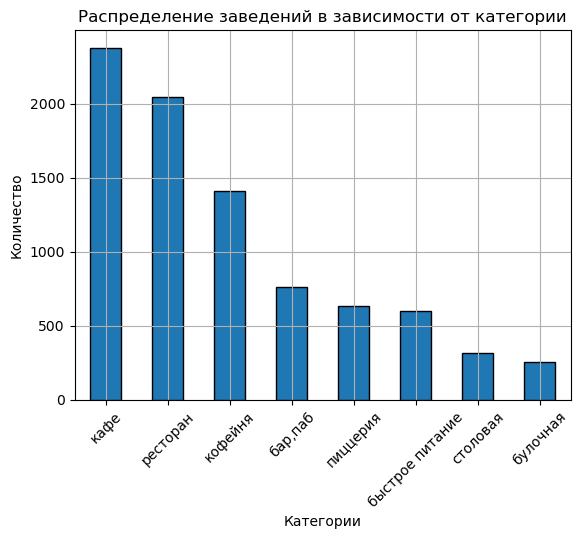

In [28]:
# Строим столбчатую диаграмму для отображения распределения категорий заведений.
grouped_by_categories = df_merged.groupby('category')['id'].count().sort_values(ascending=False)
grouped_by_categories.plot(
    kind='bar', 
    title='Распределение заведений в зависимости от категории', 
    ylabel='Количество', 
    xlabel='Категории', 
    rot=45, 
    grid=True, 
    edgecolor='black')
plt.show()

- На диаграмме видно, что лидирующими категориями являются `кафе` (2376 заведений) и `рестораны` (2042 заведения).
Значительно меньше представлены категории `кофейни` (1413 заведений), `пиццерии` (633) и `заведения быстрого питания` (603).
Минимальное количество заведений приходится на `булочные` (256) и `столовые` (315).

---

### Административные районы Москвы

- В рамках анализа были изучены административные районы Москвы, представленные в данных.
Для каждого округа было рассчитано количество заведений общественного питания, что позволило оценить распределение объектов по территории города.
- Дополнительно был проведён отдельный анализ для Центрального административного округа (ЦАО): рассмотрено распределение заведений по категориям внутри округа. Это позволило выявить особенности структуры общественного питания в наиболее насыщенной части города.
- Результаты анализа представлены в виде  визуализаций, позволяющих сравнить округа между собой и оценить различия в категориях заведений внутри ЦАО.

- Отображаем абсолютное и относительное количество заведений по административным районам.

In [29]:
# Считаем количество и долю заведений для каждой категории
grouped_by_district = df_merged.groupby('district')['id'].count().reset_index(name='count')

total_by_district = grouped_by_district['count'].sum()
grouped_by_district['share'] = grouped_by_district['count'] / total_by_district
grouped_by_district.rename(columns={'district': 'Округ', 'count': 'Кол-во', 'share': 'Доля'}, inplace=True)
grouped_by_district['Округ'] = grouped_by_district['Округ'].str.capitalize()
grouped_by_district.set_index('Округ', inplace=True)

display(grouped_by_district.sort_values(by='Доля', ascending=False))

,Кол-во,Доля
Округ,,
Центральный административный округ,2242,0.266841
Северный административный округ,898,0.106879
Южный административный округ,892,0.106165
Северо-восточный административный округ,890,0.105927
Западный административный округ,850,0.101166
Восточный административный округ,798,0.094977
Юго-восточный административный округ,714,0.084980
Юго-западный административный округ,709,0.084385
Северо-западный административный округ,409,0.048679


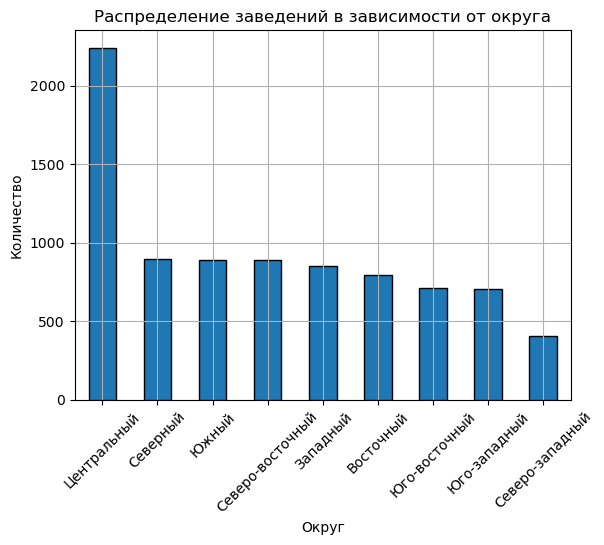

In [30]:
# Создаем словарь с короткими названиями районов для удобства визуализации.
districts_short = {
    'северный административный округ': 'Северный',
    'северо-восточный административный округ': 'Северо-восточный',
    'северо-западный административный округ': 'Северо-западный',
    'западный административный округ': 'Западный',
    'центральный административный округ': 'Центральный',
    'восточный административный округ': 'Восточный',
    'юго-восточный административный округ': 'Юго-восточный',
    'южный административный округ': 'Южный',
    'юго-западный административный округ': 'Юго-западный'
}

# Считаем количетво заведений для каждого округа.
grouped_by_districts = df_merged.groupby('district')['id'].count().sort_values(ascending=False)

# Заменяем длинные названия на сокращённые.
grouped_by_districts.index = grouped_by_districts.index.to_series().replace(districts_short)

# Строим столбчатую диаграмму распределения заведений по округам.
grouped_by_districts.plot(
    kind='bar', 
    title='Распределение заведений в зависимости от округа', 
    ylabel='Количество', 
    xlabel='Округ', 
    rot=45, 
    grid=True, 
    edgecolor='black')
plt.show()

- Большая часть заведений общественного питания сосредоточена в Центральном округе Москвы (2242 заведения). Наименьшее количество зафиксировано в Северо-западном округе (409). В оставшихся округах количество заведений варьируется, но находится примерно на одном уровне (709-898).

---

- Строим столбчатую диаграмму распределения категорий заведений в центральном округе.

- Отображаем количество заведений по категориям в ЦАО в абсолютных и относительных значениях.

In [31]:
# Фильтруем данные, оставляем только заведения центрального округа.
central_district_catering = df_merged[df_merged['district'] == 'центральный административный округ']

# Считаем количество и долю заведений для каждой категории
grouped_by_central = central_district_catering.groupby('category')['id'].count().reset_index(name='count')

total_by_central = grouped_by_central['count'].sum()
grouped_by_central['share'] = grouped_by_central['count'] / total_by_central
grouped_by_central.rename(columns={'category': 'Категория', 'count': 'Кол-во', 'share': 'Доля'}, inplace=True)
grouped_by_central['Категория'] = grouped_by_central['Категория'].str.capitalize()
grouped_by_central.set_index('Категория', inplace=True)

display(grouped_by_central.sort_values(by='Доля', ascending=False))

,Кол-во,Доля
Категория,,
Ресторан,670,0.298840
Кафе,464,0.206958
Кофейня,428,0.190901
"Бар,паб",364,0.162355
Пиццерия,113,0.050401
Быстрое питание,87,0.038805
Столовая,66,0.029438
Булочная,50,0.022302


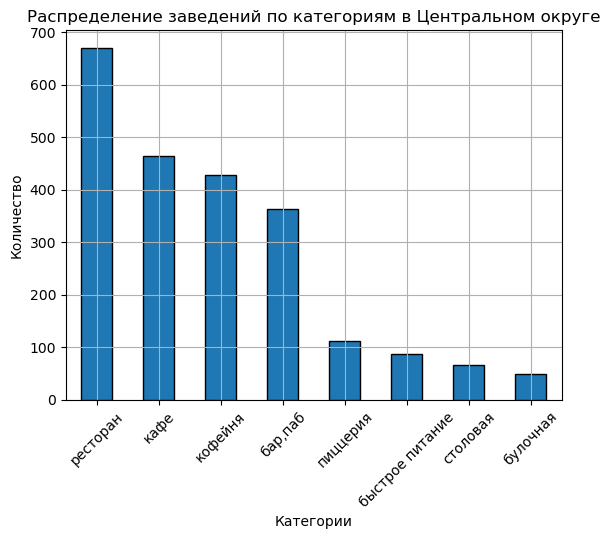

In [32]:
# Считаем количество заведений для каждой категории.
central_district_catering_by_category = central_district_catering.groupby('category')['id'].count().sort_values(ascending=False)

# Строим график.
central_district_catering_by_category.plot(
    kind='bar', 
    title='Распределение заведений по категориям в Центральном округе', 
    ylabel='Количество', 
    xlabel='Категории', 
    rot=45, 
    grid=True, 
    edgecolor='black'
)
plt.show()

- Дополнительно исследуем распределение количества заведений в Западном административном округе. Средний чек в этом округе достаточно высок по сравнению с остальными, хотя и уступает Центральному, что и обусловливает интерес к его анализу.

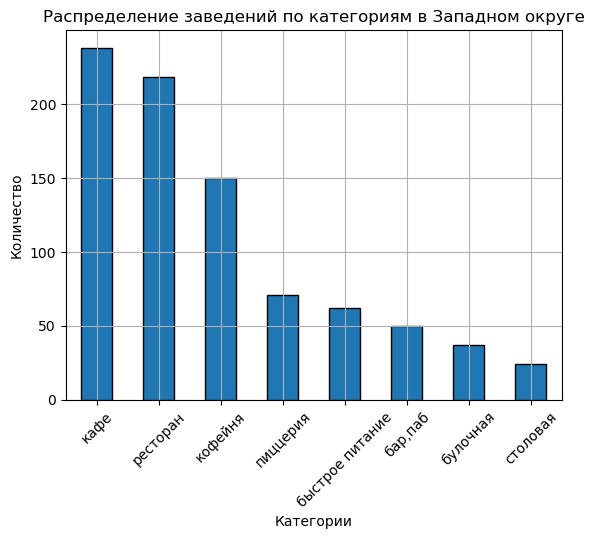

In [33]:
# Фильтруем данные, оставляем только заведения западного округа.
western_district_catering = df_merged[df_merged['district'] == 'западный административный округ']

# Считаем количество заведений для каждой категории.
western_district_catering_by_category = western_district_catering.groupby('category')['id'].count().sort_values(ascending=False)

# Строим столбчатую диаграмму распределения категорий заведений в западном округе.
western_district_catering_by_category.plot(
    kind='bar', 
    title='Распределение заведений по категориям в Западном округе', 
    ylabel='Количество', 
    xlabel='Категории', 
    rot=45, 
    grid=True, 
    edgecolor='black'
)
plt.show()

- В центральном округе больше всего ресторанов (670), на лидирующих позициях также стоят кафе (464), кофейни (428) и бары,пабы (364).
- В западном округе больше всего кафе (238), ресторанов (218) и кофеен (150).

- Заведения лидирующие по всем округам Москвы: кафе (28%) и рестораны (24%), далее кофейни (17%) и бары,пабы (9%).
- В Центральном округе рестораны занимают первое место (22% от заведений округа), далее  кафе (15%), кофейни (14%) и бары,пабы (12%). При этом, в Центральном округе находится треть всех ресторанов Москвы (670 из 2042) и почти треть всех кофеен (428 из 1413).

---

### Сетевые и несетевые заведения

- В рамках анализа было изучено соотношение сетевых и несетевых заведений общественного питания как в целом по данным, так и в разрезе категорий заведений.
- Была оценена доля сетевых и несетевых объектов, что позволило определить, каких заведений в данных больше. Дополнительно был проведён анализ по категориям, чтобы выявить, какие типы заведений чаще представлены сетевыми форматами.
- Результаты исследования представлены с помощью визуализаций, позволяющих наглядно сравнить структуру рынка и выделить категории с наибольшей долей сетевых заведений.

- Выводим абсолютное и относительное количество заведений по типу (сетевые/несетевые).

In [34]:
# Считаем количетво заведений для каждого типа.
catering_type = df_merged.groupby('chain')['id'].count()

# Формируем таблицу с абсолютными и относительными значениями
catering_types = pd.DataFrame({
    "Тип заведения": catering_type.index.map({True: 'Сетевое', False: 'Несетевое'}),
    "Кол-во": catering_type.values,
    "Доля": (catering_type.values / catering_type.values.sum()).round(3)
})

display(catering_types)

,Тип заведения,Кол-во,Доля
0,Несетевое,5199,0.619
1,Сетевое,3203,0.381


- Строим круговую диаграмму, показывающую распределение заведений на сетевые и несетевые.

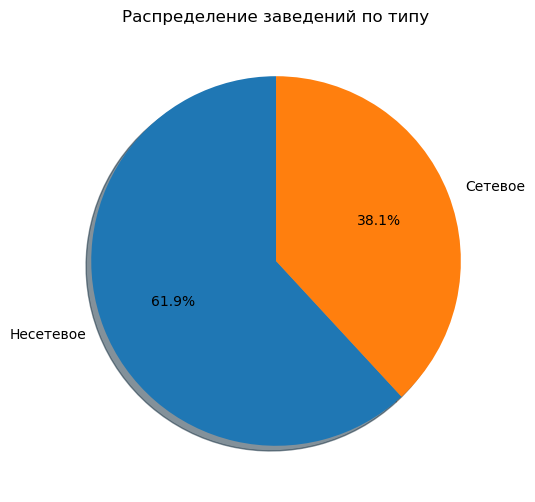

In [35]:
# Создаём словарь для преобразования бинарного признака в текстовое обозначение типа заведения.
is_chain = {True: 'Сетевое', 
            False: 'Несетевое'}

# Заменяем индекс на текстовое обозначение типа и строим график.
catering_type.index = catering_type.index.to_series().replace(is_chain)
catering_type.plot(
    kind='pie',
    labels=catering_type.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    figsize=(6, 6)               
)
plt.title('Распределение заведений по типу')
plt.ylabel('')
plt.show()

- Большинство заведений общественного питания в Москве не являются сетевыми: к несетевым относятся 5199 заведений, к сетевым - 3203 заведения.
---

- Строим диаграмму отражающую соотношение сетевых и несетевых заведений в разрезе категорий.

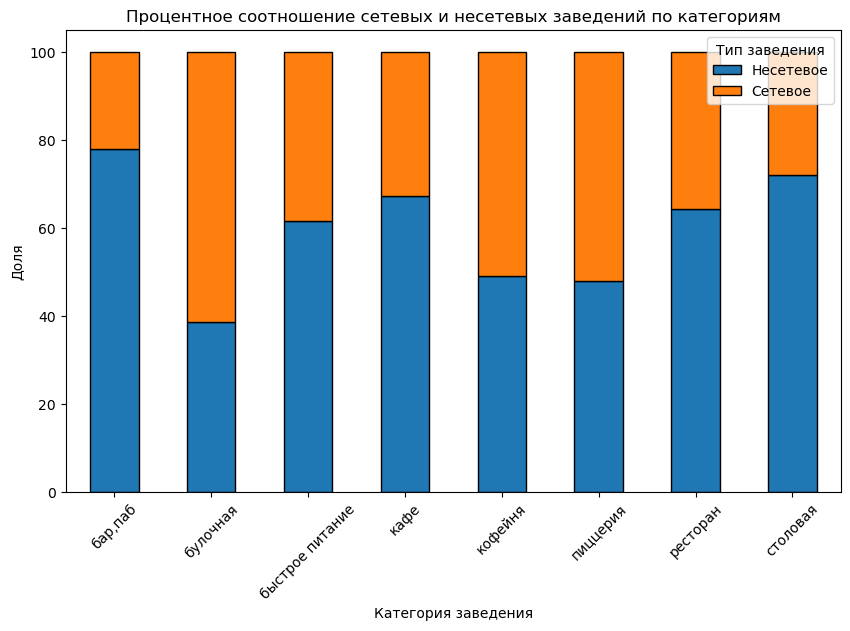

In [36]:
# Считаем количество заведений для каждой категории и типа заведения, убираем мультииндекс.
grouped = df_merged.groupby(['category', 'chain'])['id'].count().unstack(fill_value=0)

# Рассчитываем долю сетевых и несетевых заведений в процентах для каждой категории.
grouped_pct = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Строим график.
grouped_pct.plot(
    kind='bar',  
    stacked=True,
    figsize=(10,6),
    edgecolor='black',
    ylabel='Доля',
    xlabel = 'Категория заведения',
    title='Процентное соотношение сетевых и несетевых заведений по категориям',
    rot=45
)

plt.legend(title='Тип заведения', labels=['Несетевое', 'Сетевое'])
plt.show()

- Среди сетевых заведений наибольшие доли у категорий: **булочные** (61%), **пиццерии** (52%) и **кофейни** (51%).
- Наибольшая доля несетевых заведений наблюдается в категориях **бар, паб** (78%), **столовая** (72%) и **кафе** (67%).

---

### Количество посадочных мест в заведениях

- В рамках анализа было изучено распределение количества посадочных мест в заведениях общественного питания.
- Были выявлены возможные аномальные значения и выбросы, а также рассмотрены причины их появления. Дополнительно для каждой категории заведений было определено типичное количество посадочных мест, что позволило сравнить форматы заведений между собой.
- Результаты анализа представлены с помощью визуализаций, отражающих распределения и различия по категориям.


- Выводим сводную статистику столбца при помощи метода `describe`.

In [37]:
df_merged['seats'].describe()

count    4792.000000
mean      108.361435
std       122.841225
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

- Типичное количество посадочных мест составляет 75 (медиана). Половина заведений находится в диапазоне 40-140 мест.
---

- Строим гистограмму распределения количества мест в заведениях.

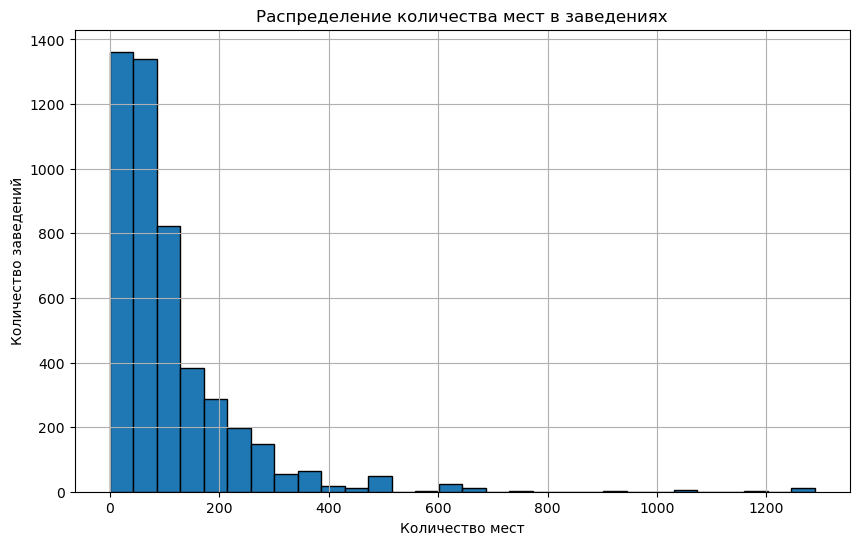

In [38]:
# Строим график.
df_merged['seats'].plot(
    kind='hist',
    bins=30, 
    edgecolor='black',
    xlabel='Количество мест',
    ylabel='Количество заведений',
    title='Распределение количества мест в заведениях',
    figsize=(10,6),
    grid=True
)
plt.show()

- На гистограмме наблюдается правосторонняя асимметрия, большинство заведений имеют относительно небольшое количество посадочных мест, но встречаются редкие но достаточно крупные по количеству посадочных мест заведения.
---

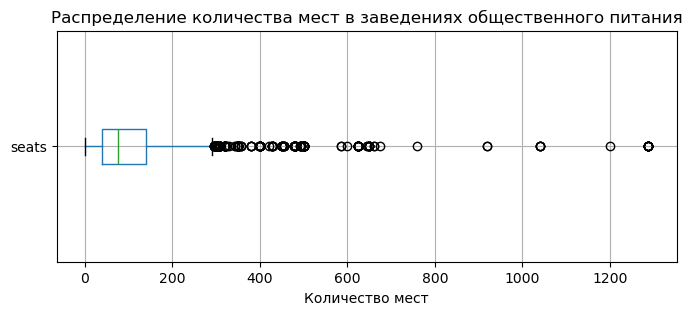

In [39]:
# Строим диаграмму размаха для исследования распределения количества посадочных мест и выявления выбросов.
df_merged.boxplot(
    column='seats', 
    vert=False,
    figsize=(8, 3))

plt.title('Распределение количества мест в заведениях общественного питания')
plt.xlabel('Количество мест')
plt.show()

- На диаграмме размаха видно, что вероятные выбросы начинаются с числа посадочных мест примерно от 300 и выше. Поэтому необходимо проверить эти данные и выяснить являются ли эти значения аномалиями, либо имеют какое-либо логическое объяснение.
- В данных также присутствую нулевые значения, следует посчитать их количество чтобы понимать их объем.

In [40]:
# Считаем количество заведений с нулевым значением в столбце с количеством мест.
df_merged[df_merged['seats'] == 0].shape[0]

136

- Во всём датафрейме обнаружено 136 заведений с нулевым значением количества посадочных мест. Отсутствие посадочных мест не обязательно является ошибкой, это может быть связано с форматом заведения, например кафе с торговлей на вынос, или доставка. В контексте данного анализа такие значения можно считать аномальными, поскольку исследуется именно количество посадочных мест.

In [41]:
# Группируем заведения по количеству мест превышающму 300 как предполагаемые выбросы.
over_300 = df_merged[df_merged['seats'] >= 300]
over_300.groupby('seats')['id'].count()

seats
300.0     62
305.0      1
306.0      8
307.0      3
308.0      1
310.0      4
320.0     33
326.0      1
330.0      1
343.0      2
350.0     56
356.0      3
380.0      4
398.0      2
400.0     11
420.0      1
428.0      5
430.0      1
450.0      6
455.0      4
478.0      4
480.0     13
481.0      2
491.0      2
495.0      6
500.0     21
585.0      2
600.0      1
625.0     23
644.0      2
650.0      6
660.0      2
675.0      1
760.0      1
920.0      2
1040.0     4
1200.0     1
1288.0    11
Name: id, dtype: int64

In [42]:
# Выводим заведения с наибольшим количеством мест.
df_merged[df_merged['seats'] == 1288]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
6514,fbf22d98b62a47fbb2a71be3545f16b2,delonixcafe,ресторан,"москва, проспект вернадского, 94, корп. 1",западный административный округ,"ежедневно, круглосуточно",4.1,False,1288.0,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,1
6520,c93d20f53072495c9cf2e489914cb8a5,ян примус,ресторан,"москва, проспект вернадского, 121, корп. 1",западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",4.5,True,1288.0,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,0
6570,5925d9677fe24778a27e35ccd88c0a2d,мюнгер,пиццерия,"москва, проспект вернадского, 97, корп. 1",западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",4.8,True,1288.0,NaN,NaN,NaN,NaN,0
6637,0508ba663a4c42d1b5068e51afcc26ef,one price coffee,кофейня,"москва, проспект вернадского, 84, стр. 1",западный административный округ,"ежедневно, 08:30–20:00",4.3,True,1288.0,NaN,NaN,NaN,NaN,0
6654,19a223ff04f74af7a12bd87b77ce468b,гудбар,"бар,паб","москва, проспект вернадского, 97, корп. 1",западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",4.1,False,1288.0,средние,Средний счёт:700 ₽,700.0,NaN,0
6680,6287fb9811434558a4ada0ae08be9c04,пивной ресторан,"бар,паб","москва, проспект вернадского, 121, корп. 1",западный административный округ,NaN,4.5,False,1288.0,NaN,NaN,NaN,NaN,0
6686,f9e4ec2d1e5946cf83c9564b2d06acd6,японская кухня,ресторан,"москва, проспект вернадского, 121, корп. 1",западный административный округ,NaN,4.4,True,1288.0,NaN,NaN,NaN,NaN,0
6767,6f85ea6419c941208f7deee9194383e1,точка,кафе,"москва, проспект вернадского, 84, стр. 1",западный административный округ,NaN,4.7,True,1288.0,NaN,NaN,NaN,NaN,0
6803,ba5a32dfee6c4661a25c0ea2d39f393d,loft-cafe академия,кафе,"москва, проспект вернадского, 84, стр. 1",западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,3.6,False,1288.0,NaN,NaN,NaN,NaN,0
6804,a555f30eac234e6ca28480afa418ed3c,яндекс лавка,ресторан,"москва, проспект вернадского, 51, стр. 1",западный административный округ,"ежедневно, круглосуточно",4.0,True,1288.0,NaN,NaN,NaN,NaN,1


- По выборке видно что у заведений совпадает адрес, но при этом не всегда совпадает номер дома. Исходя из этого можно предположить что заведения находятся в одном ТЦ, поскольку у ТЦ может быть несколько адресов в зависимости от входов. Количество мест в заведениях одинаковое, скорее всего это потому что они находятся на одном фудкорте и количество указано общее. Судя по сгруппированным данным, это не все заведения которые могут относиться к фудкортам, и возможно в датасете присутствуют и другие.
- Для отображения наиболее типичного количества посадочных мест заведений будет использовано медианное значение, поскольку оно наименее чувствительно к выбросам. Нулевые значения будут исключены при визуализации, значения превышающие 300 исключать не следует, поскольку они не являются аномалиями.

---

- Определим медианное значение количества мест для каждой категории заведений.

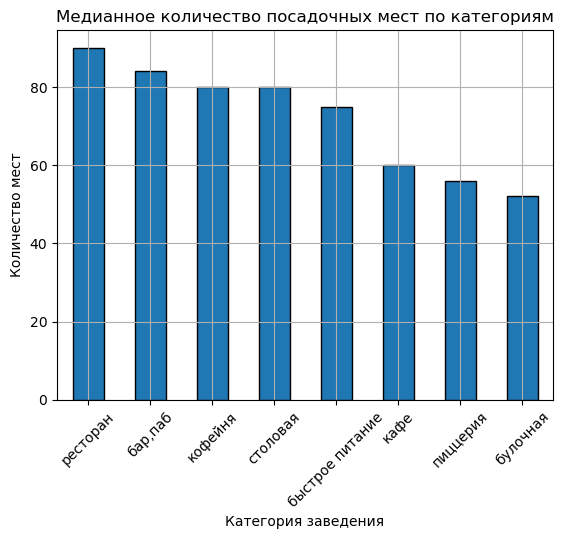

In [43]:
# Фильтруем данные чтобы избавиться от нулевых значений.
df_filtered = df_merged[(df_merged['seats'] > 0)]

# Рассчитываем медиану.
seats_num_median = df_filtered.groupby('category')['seats'].median().sort_values(ascending=False)

# Строим график.
seats_num_median.plot(
    kind='bar',
    rot=45,
    title='Медианное количество посадочных мест по категориям',
    xlabel='Категория заведения',
    ylabel='Количество мест',
    grid=True,
    edgecolor='black'
)
plt.show()

- График отражает наиболее типичное количество посадочных мест для каждого типа заведения. Наибольшее количество мест характерно для **ресторанов** - медианное значение составляет 80, а наименьшее - для **булочных** (50 мест).

---

### Рейтинги заведений общественного питания

- В рамках анализа было рассмотрено распределение средних рейтингов заведений общественного питания в разрезе категорий.
- Для каждой категории были изучены усреднённые значения рейтингов, что позволило оценить, насколько сильно различаются оценки посетителей между разными типами заведений. Результаты анализа представлены с помощью визуализаций, отражающих распределение рейтингов по категориям.
- На основе полученных данных сделаны выводы о степени различий в средних рейтингах между категориями заведений.

- Строим столбчатую диаграмму распределения среднего рейтинга по категориям заведений.

In [44]:
# Выводим сводную статистику рейтингов всех заведений.
df_merged['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470318
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [45]:
# Выводим сводную статистику рейтингов заведений в разрезе категорий.
df_merged.groupby('category')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2376.0,4.124284,0.566003,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277282,0.372251,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413142,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


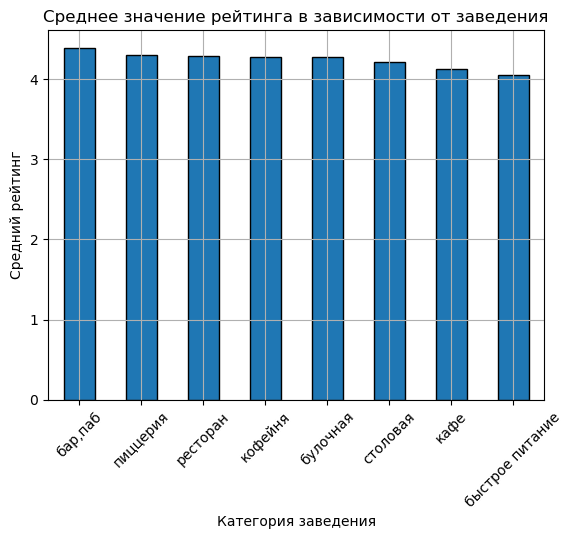

In [46]:
# Считаем средний рейтинг для каждой категории заведений.
mean_rating = df_merged.groupby('category')['rating'].mean().sort_values(ascending=False)

# Строим график.
mean_rating.plot(
    kind='bar', 
    rot=45, 
    title='Среднее значение рейтинга в зависимости от заведения', 
    xlabel='Категория заведения', 
    ylabel='Средний рейтинг',
    grid=True,
    edgecolor='black'
)

plt.show()

- Средние рейтинги по категориям разнятся, наивысший средний рейтинг наблюдается у баров (4.39), у пиццерий, ресторанов, кофеен и булочных рейтинги находятся примерно на одном уровне (4.27-4.30). Ниже рейтинги у столовых (4.21) и кафе (4.1), самый низкий рейтинг относительно остальных категорий получают заведения быстрого питания - 4.05.
- Различия в рейтингах могут быть связаны с качеством обслуживания, качеством и разнообразием блюд, атмосферой и интерьером, ценовой политикой и другими факторами.

---

### Факторы, связанные с рейтингом заведений

- В рамках анализа была исследована взаимосвязь рейтингов заведений общественного питания с различными характеристиками.
- Были рассмотрены такие параметры, как категория заведения, административный район Москвы, сетевой статус, количество посадочных мест, ценовая категория и признак круглосуточной работы. Для оценки связей между показателями была построена и визуализирована матрица корреляций.

- Создаём матрицу корреляции phik чтобы изучить силу связи данных в столбце rating с другими данными.

In [47]:
# Создаем матрицу корреляции phik.
correlation_matrix = df_merged[['rating', 'category', 'district', 'chain', 'seats',
                         'price', 'is_24_7']].phik_matrix()

print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
# Выбираем только коэффициенты корреляции с рейтингом и выводим матрицу.
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'seats', 'is_24_7']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


- Наибольший коэффициент корреляции с рейтингом заведения наблюдается у его ценовой категории и составляет 0.26, что указывает на слабую, но наибольшую среди рассмотренных факторов связь.
  
- Категория (0.20), округ (0.19), время работы (0.16) и сетевой статус (0.12) также имеют корреляцию с рейтингом, но она ниже чем у рейтинга с ценовой категорией. Отсутствует корреляция рейтинга с количеством мест в заведении.

---

- Выводим значение среднего рейтинга для каждой ценовой категории заведения.

In [48]:
avg_rating_by_price = df_merged.groupby('price')['rating'].mean().sort_values(ascending=True)
avg_rating_by_price

price
низкие           4.173077
средние          4.297874
выше среднего    4.386347
высокие          4.436611
Name: rating, dtype: float32

- Строим столбчатую диаграмму для отражения среднего рейтинга заведений каждой ценовой категории.

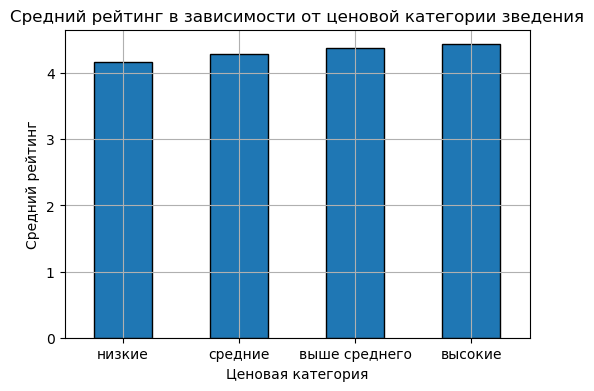

In [49]:
# Строим график.
plt.figure(figsize=(6, 4))
avg_rating_by_price.plot(
    kind='bar', 
    rot=0, 
    title='Средний рейтинг в зависимости от ценовой категории зведения', 
    xlabel='Ценовая категория', 
    ylabel='Средний рейтинг',
    grid=True,
    edgecolor='black'
)

plt.show()

- На графике видно, что медиана рейтинга немного растёт с увеличением ценовой категории, при этом разброс внутри категорий остаётся большим, особенно в средних и высоких ценовых сегментах.

- Корреляция слабая, но тенденция прослеживается, более дорогие заведения в среднем имеют более высокий рейтинг. Большой разброс показывает, что ценовой сегмент не объясняет все различия в рейтингах, и на них влияют и другие факторы.

---

### Популярные сетевые заведения Москвы

- В рамках анализа данные были сгруппированы по названиям заведений с целью выявления наиболее популярных сетей общественного питания в Москве. В качестве показателя популярности использовалось количество заведений каждой сети в регионе.
- Для топ-15 сетей было рассчитано среднее значение рейтинга, а также определены категории заведений, к которым они относятся. Полученные результаты были визуализированы для наглядного сравнения популярности сетей и их рейтинговых показателей.

- Создаём сводную таблицу с 15 самыми популярными сетями заведений, отражая их распределение по категориям и средний рейтинг.

In [50]:
# Фильтруем только сетевые заведения.
chain_est = df_merged[df_merged['chain'] == True]

# Топ-15 сетей по количеству заведений с разбивкой по категориям.
top_15 = (
    chain_est
    .groupby(['name', 'category'])
    .agg(
        count=('id', 'count'),
        mean_rating=('rating', 'mean')
    )
    .reset_index()
    .sort_values('count', ascending=False)
    .head(15)
)

# Переименовываем столбцы и оформляем таблицу.
top_15_table = (
    top_15
    .rename(columns={
        'name': 'Сеть',
        'category': 'Категория',
        'count': 'Количество заведений',
        'mean_rating': 'Средний рейтинг'
    })
    .set_index(['Сеть', 'Категория'])
)

display(top_15_table)

,,Количество заведений,Средний рейтинг
Сеть,Категория,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286487
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114285
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


- Строим линейчатую диаграмму для отображения 15 самых популярных сетей в Москве.

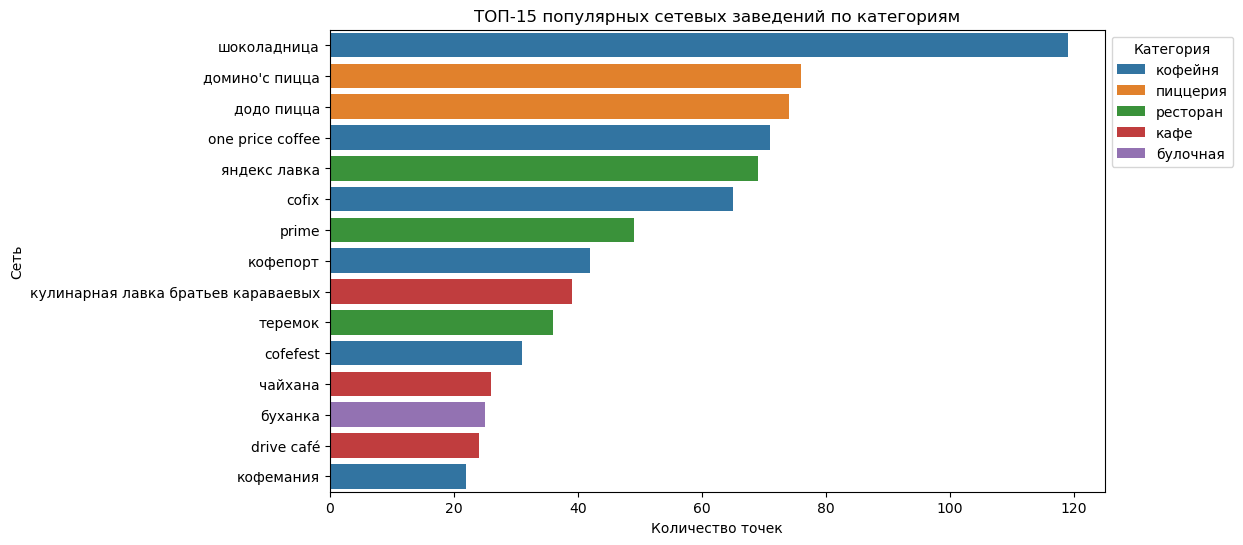

In [51]:
# Фильтруем только сетевые заведения.
chain_est = df_merged[df_merged['chain'] == True]

# Топ-15 сетей по количеству точек с разбивкой по категориям.
top_15_count = (
    chain_est
    .groupby(['name', 'category'])
    .agg(
        count_points=('id', 'count')
    )
    .reset_index()
    .sort_values('count_points', ascending=False)
    .head(15)
)

# Строим график.
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_15_count,
    y='name',
    x='count_points',
    hue='category',
    dodge=False
)

plt.title('ТОП-15 популярных сетевых заведений по категориям')
plt.xlabel('Количество точек')
plt.ylabel('Сеть')
plt.legend(title='Категория', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

- Самым популярным сетевым заведением является "Шоколадница", она идет впереди с большим отрывом и насчитывает 119 точек. После нее идут "Domino's Pizza" и "Додо Пицца", они насчитывают 76 и 74 точки соответственно.
- В топ-15 попали 6 кофеен, 3 кафе, 3 ресторана, 2 пиццерии и 1 булочная. Наиболее популярными сетевыми заведениями являются кофейни.

---

- Строим линейчатую диаграмму для отображения среднего рейтинга 15-ти самых популярных сетей (вне зависимости от категории заведения).

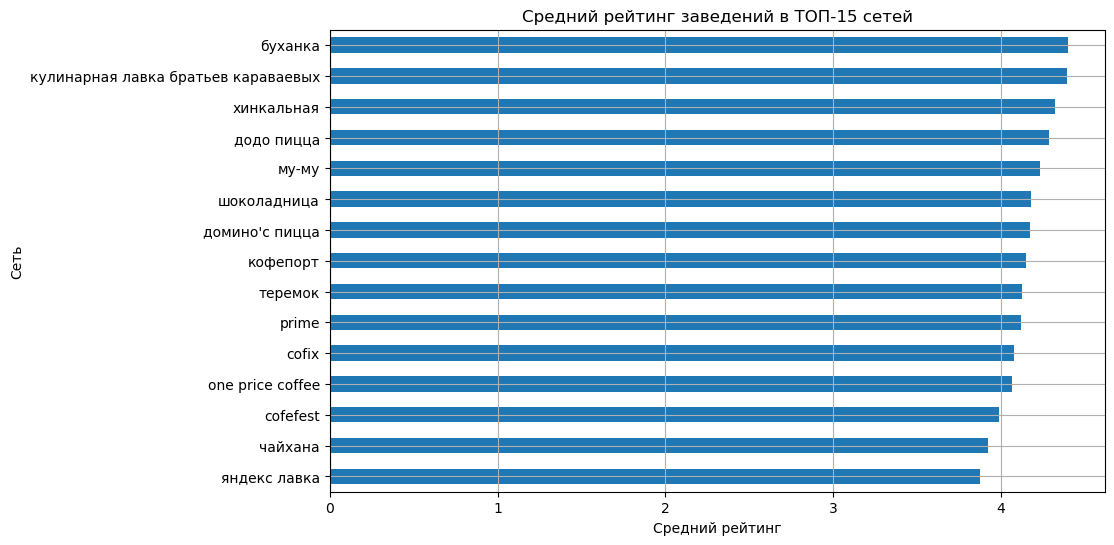

In [52]:
# Находим топ-15 сетевых заведений по популярности.
top_15_rating = (
    chain_est.groupby('name')['id']
    .count()
    .sort_values(ascending=False)
    .head(15)
)

# Получаем список названий сетей.
top_15_names = top_15_rating.index.tolist()

# Рассчитываем средний рейтинг по сетям.
top_15_avg_rating = (
    chain_est[chain_est['name'].isin(top_15_names)]
    .groupby('name')['rating']
    .mean()
    .loc[top_15_rating.index]
)

# Сортируем данные.
top_15_avg_rating = top_15_avg_rating.sort_values(ascending=False)

# Строим график.
top_15_avg_rating.plot(
    kind='barh',
    figsize=(10, 6),
    title='Средний рейтинг заведений в ТОП-15 сетей',
    xlabel='Средний рейтинг',
    ylabel='Сеть',
    grid=True
)

plt.gca().invert_yaxis()
plt.show()

- Наивысшие средние рейтинги среди заведений получили «Буханка» (4.40) и «Кулинарная лавка братьев Караваевых» (4.39). В тройку лидеров также вошла «Хинкальная» с рейтингом 4.32. Ниже идут «Додо Пицца» (4.29) и «Му-Му» (4.23), остальные заведения имеют средние рейтинги ниже 4.2.

---

### Средний чек заведений в зависимости от района Москвы

- В рамках анализа была изучена зависимость среднего чека заведений общественного питания (`middle_avg_bill`) от их расположения в административных районах Москвы.
- Проведено сравнение заведений, расположенных в Центральном административном округе, с заведениями в других районах города. На основе полученных данных была проанализирована связь между удалённостью от центра и уровнем цен в заведениях.

- Строим гистограмму для отображения распределения значений среднего чека.

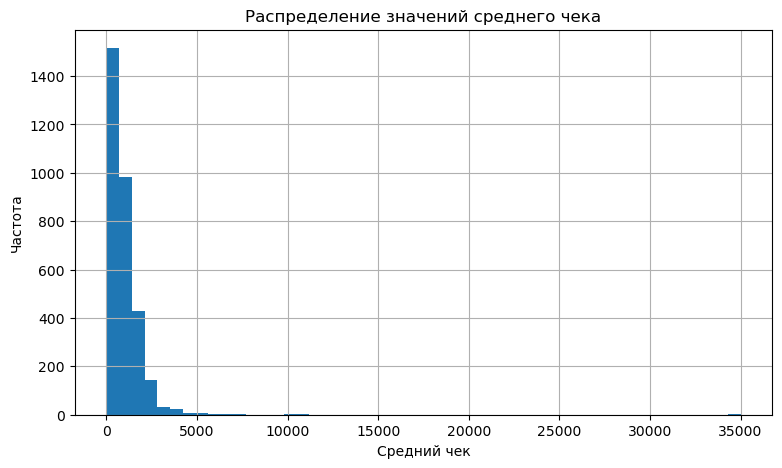

In [53]:
# Строим график.
ax = df_merged['middle_avg_bill'].plot(
    kind='hist', 
    bins=50, 
    grid=True, 
    figsize=(9, 5),
    title='Распределение значений среднего чека',
    )

ax.set_xlabel('Средний чек')
ax.set_ylabel('Частота')
plt.show()

- Строим диаграмму размаха для отображения распределения значений среднего чека. 

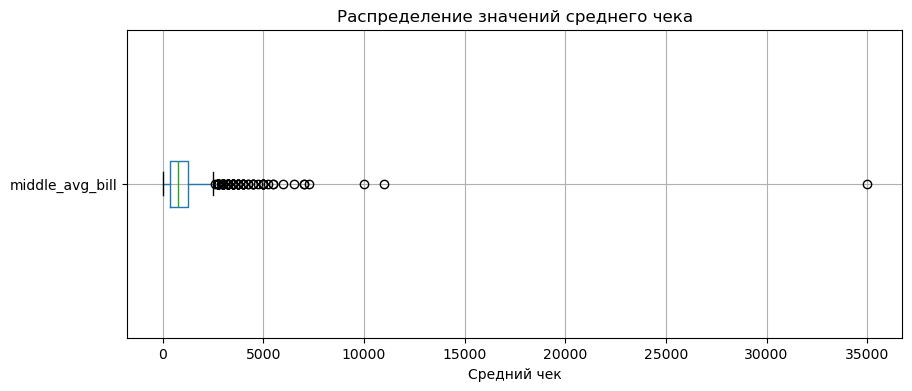

In [54]:
# Строим график.
avg_bill_boxplot = df_merged.boxplot(
    column='middle_avg_bill', 
    vert=False, 
    figsize=(10, 4),
    )

avg_bill_boxplot.set_title('Распределение значений среднего чека')
avg_bill_boxplot.set_xlabel('Средний чек')
plt.show()

In [55]:
# Проверяем наличие и количество строк с нулевым значением среднего чека.
df_merged[df_merged['middle_avg_bill'] < 1]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
3684,502d91289bc5470eabd77fd77cc79821,кофемания,кофейня,"москва, улица новый арбат, 19",центральный административный округ,"ежедневно, круглосуточно",4.5,True,200.0,высокие,Средний счёт:от 0 ₽,0.0,NaN,1


In [56]:
# Проверяем записи с вероятно аномальными значениями.
df_merged[df_merged['middle_avg_bill'] >= 10000]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
729,8ce8586978ff40d59375f65ef90757c2,чойхона,"бар,паб","москва, дмитровское шоссе, 95а",северный административный округ,"ежедневно, 10:00–23:00",4.4,False,49.0,высокие,Средний счёт:5000–17000 ₽,11000.0,NaN,0
5477,b73dde11d59e435d98d3004a614a9c3f,гости,ресторан,"москва, шоссе энтузиастов, 52",восточный административный округ,"пн,вс 18:00–22:30",4.1,False,NaN,высокие,Средний счёт:5000–15000 ₽,10000.0,NaN,0
7173,07b4e95afe8b4d299f823dc4f9de6df5,кафе,ресторан,"москва, каширское шоссе, 23, стр. 2",южный административный округ,"ежедневно, круглосуточно",4.1,False,100.0,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,1


- В данных присутствуют аномальное значения среднего чека: одна запись с нулевым значением, и вероятно аномальные значения: заведения с очень высокими чеками (10 000-11 000 руб.), которые, могут относиться к премиум-сегменту, а также одно экстремальное значение в 35 000 руб., которое можно рассматривать как выброс.

- Для анализа среднего чека заведений в зависимоси от округа будет использовано медианное значение, для того чтобы избежать искажений вызванных возможными выбросами. Среднее значение тоже будет рассчитано, но его необходимо интерпретировать с учётом наличия аномалий.

---

- Считаем долю пропусков в столбце `middle_avg_bill` для каждого округа для более объективной оценки.

In [57]:
# Заполненность данных по регионам.
pd.DataFrame(df_merged.groupby('district')['middle_avg_bill'].apply(lambda x: x.isna().mean()))

,middle_avg_bill
district,
восточный административный округ,0.674185
западный административный округ,0.640000
северный административный округ,0.641425
северо-восточный административный округ,0.661798
северо-западный административный округ,0.616137
центральный административный округ,0.527208
юго-восточный административный округ,0.728291
юго-западный административный округ,0.668547
южный административный округ,0.647982


- В данных присутствует значительная доля пропусков (от ~53% в Центральном округе до ~73% в Юго-восточном округе), поэтому сравнение округов следует рассматривать с учётом возможной неполноты данных.

---

- Строим сводную таблицу для отображения среднего и медианного значений среднего чека для каждого округа.

In [58]:
# Строим таблицу.
pivot_avg_bill = (
    pd.pivot_table(
        df_merged,
        index='district',
        values='middle_avg_bill',
        aggfunc=['median', 'mean']
    )
    .reset_index()
)

# Переименовываем имена столбцов.
pivot_avg_bill.columns = ['Округ', 'Медианный чек', 'Средний чек']

display(pivot_avg_bill)

,Округ,Медианный чек,Средний чек
0,восточный административный округ,575.0,820.626953
1,западный административный округ,1000.0,1053.225464
2,северный административный округ,650.0,927.959656
3,северо-восточный административный округ,500.0,716.611267
4,северо-западный административный округ,700.0,822.222900
5,центральный административный округ,1000.0,1191.057495
6,юго-восточный административный округ,450.0,654.097961
7,юго-западный административный округ,600.0,792.561707
8,южный административный округ,500.0,834.398071


- Строим линейчатую диаграмму, отражающую среднее и медианное значения среднего чека по округам.

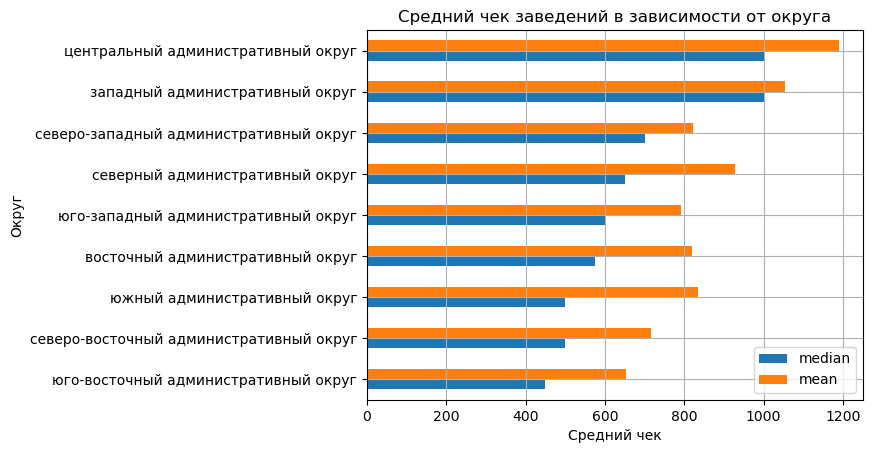

In [59]:
# Считаем средний и медианный чек для каждого округа.
avg_bill_by_district = df_merged.groupby('district')['middle_avg_bill'].agg(['median', 'mean']).sort_values('median', ascending=True)

# Строим график.
avg_bill_by_district.plot(
    kind='barh',
    grid=True,
    title='Средний чек заведений в зависимости от округа',
    xlabel='Средний чек',
    ylabel='Округ'
)

plt.show()

- Среднее значение среднего чека в центральном округе заметно выше, чем в других округах, и составляет 1191 руб. Наиболее близкое значение у западного округа - 1053 руб. Минимальное среднее значение наблюдается в юго-восточном округе - 654 руб.

- Медианный чек в центральном и западном округах одинаковый - 1000 руб. Это говорит о том, что в центральном округе присутствуют заведения с очень высокими чеками, которые увеличивают среднее значение. Однако типичный средний чек (по медиане) в этих двух округах одинаковый.

---


In [60]:
# Создаем новый столбец для разделения центрального административного округа от остальных.
df_merged['district_group'] = df_merged['district'].apply(
    lambda x: 'Центральный' if x.strip().lower() == 'центральный административный округ' else 'Остальные'
)

- Строим диаграмму размаха для отображения распределения среднего чека в Центральном округе и остальных округах.

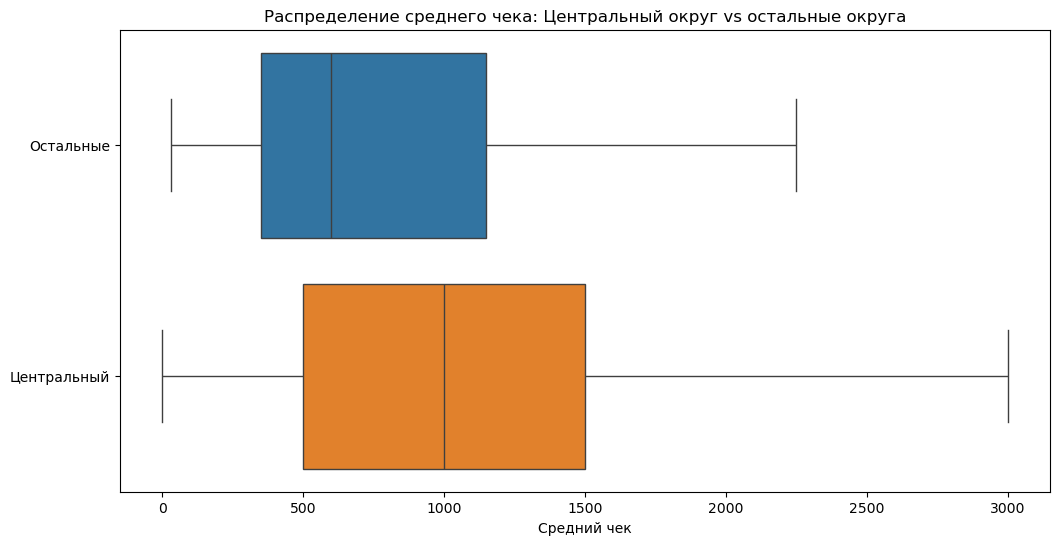

In [61]:
# Строим график.
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_merged,
    x='middle_avg_bill',
    y='district_group',
    hue='district_group',
    showfliers=False
)
plt.title('Распределение среднего чека: Центральный округ vs остальные округа')
plt.xlabel('Средний чек')
plt.ylabel('')
plt.show()

- Медиана среднего чека в Центральном округе выше, чем в других районах, и составляет примерно 1000 руб. В обоих распределениях наблюдается достаточно большой разброс, при этом в Центральном округе он выражен сильнее: заметна доля заведений со средними чеками выше медианных значений.

- Распределения имеют правостороннюю асимметрию, что говорит о наличии заведений с высоким средним чеком.

- Можно сделать вывод что в Центральном округе заведения в среднем дороже, чем в других районах Москвы.

---

- Определим медианное значение среднего чека для каждой категории заведений.

In [62]:
# Считаем медиану среднего чека для каждого типа заведения.
pd.DataFrame(df_merged.groupby('category')['middle_avg_bill'].median())

,middle_avg_bill
category,
"бар,паб",1250.0
булочная,450.0
быстрое питание,375.0
кафе,550.0
кофейня,400.0
пиццерия,600.0
ресторан,1250.0
столовая,300.0


- Наибольшие медианные значения среднего чека у баров и ресторанов (1250 руб.), относительно среднее у пиццерий (600 руб.) и кафе (550 руб.), низкие значения у булочных, кофеен, заведений быстрого питания и столовых (300-450 руб.)

---

### Промежуточный вывод

- Всего представлено 7 категорий заведений, это: кафе (2376 заведений), рестораны (2042 заведения), кофейни (1413 заведений), пиццерии (633), заведения быстрого питания (603), столовые (315) и булочные (256).
- Из представленных 8402 заведений 2242 приходятся на центральный административный округ Москвы (около 27%), наименьшее количество зафиксировано в северо-западном административном округе (409 заведений, около 5%). На другие округа приходится приблизительно равная часть заведений - от 709 до 898 заведений (8%-10%).
- В центральном административном округе больше всего ресторанов (670), кафе (464), кофеен (428) и баров, пабов (364); в западном - кафе (238), ресторанов (218) и кофеен (150).
- Большинство заведений не являются сетевыми: несетевые - 5199 заведений (61.9%), сетевые - 3203 заведения (38.1%).
- Сетевыми чаще всего являются: булочные (61%), пиццерии (52%) и кофейни (51%), несетевыми: бары, пабы (78%), столовые (72%) и кафе (67%).
- У ряда заведений совпадают адреса и количество мест. В случае небольших заведений с малым числом мест можно предположить, что они просто расположены по одному адресу, например, в торговом центре с примерно одинаковым пространством под коммерцию, и поэтому количество мест совпадает. В случае с заведениями с большим количеством мест, например, 1288, можно предположить, что они находятся на фудкорте большого ТЦ. У таких заведений адреса часто совпадают не полностью - отличается только номер корпуса или входа, что объясняется особенностями крупных ТЦ.
- Исходя из вышеописанных особенностей, для определения наиболее типичного количества мест в каждой категории заведений была рассчитана медиана количества мест. Наибольшее количество мест характерно для ресторанов - медианное значение составляет 80, а наименьшее - для булочных (50 мест).
- Средние рейтинги у разных категорий отличаются, наивысший показатель у баров (4.39), средний у пиццерий, ресторанов, кофеен и булочных (4.27-4.30), низкий у столовых, кафе и заведений быстрого питания (4.05-4.21).
-  Наибольший коэффициент корреляции с рейтингом заведения наблюдается у ценовой категории и составляет 0,26, что указывает на слабую, но наибольшую среди рассмотренных факторов связь. Диаграмма размаха показала, что медиана рейтинга немного растет с увеличением ценовой категории, что подтверждает слабую корреляцию. Исходя из этого, можно выделить тенденцию: более дорогие заведения в среднем имеют более высокий рейтинг, однако это не единственный фактор, влияющий на него, так как в данных присутствует большой разброс значений и другие влияющие переменные.
- Самым популярным сетевым заведением является «Шоколадница» - всего 119 точек. Наиболее популярными сетевыми заведениями в целом являются кофейни.
- Средние рейтинги сетевых заведений не сильно различаются: наивысшие показатели у «Буханка» (4,40) и «Кулинарная лавка братьев Караваевых» (4,39), у остальных сетей средний рейтинг находится в диапазоне от 3,9 до 4,3.
-  Средний и медианный чек в Центральном округе заметно выше, чем в других районах (среднее - 1191 руб., медиана - ~1000 руб.), при этом наблюдается значительный разброс и наличие заведений с высокими чеками. Это указывает на то, что заведения Центрального округа в среднем дороже, чем в других округах Москвы. Средний чек Западного округа немного отстает, но также является относительно высоким - 1053 руб. Для анализа среднего чека использовался показатель middle_avg_bill. Данные содержат значительную долю пропусков (от ~53% в Центральном округе до ~73% в Юго-восточном округе), поэтому сравнение округов следует рассматривать с учётом неполноты данных.

## 4. Итоговый вывод и рекомендации

#### Обзор проделанной работы

- Основные датасеты `rest_info` и `rest_price` были получены путем выгрузки данных из файлов `rest_info.csv` и `rest_price.csv`, путем их объединения был получен единый датасет `df_merged`, с ним и производились основные действия. 
- Данные в столбцах `rating`, `seats`, `middle_avg_bill`, `middle_coffee_cup` и `chain` были приведены к более подходящим типам.
- Изучены пропуски и выдвинуты гипотезы о их предположительном возникновении и определены методы работы с ними.
- Проведена нормализация данных столбцов `name`, `address`, `district`, `category` с целью поиска неявных дубликатов в данных.
- Найдены и удалены 4 неявных дубликата (0.05% данных).
- Созданы столбцы: `is_24_7` (хранит бинарный признак показывающий является ли заведение круглосуточным) и `district_group` (показывает принадлежность заведения к центральному округу, либо к остальным округам Москвы).
- Проведен исследовательский анализ данных (ИАД):
    - Проанализировано количество объектов общественного питания по категориям.
    - Изучено распределение заведений по административным районам. Для Центрального и Западного административных округов построено отдельное распределение заведений по категориям.
    - Проанализировано соотношение сетевых и несетевых заведений в целом и по категориям. Выявлено, каких заведений больше, а также какие категории чаще являются сетевыми.
    - Изучено количество посадочных мест в заведениях. Выявлены аномальные значения и выбросы с возможными причинами их появления. Для каждой категории заведений определено наиболее типичное количество мест.
    - Построено распределение средних рейтингов по категориям заведений.
    - Построена матрица корреляции рейтинга заведений с различными характеристиками: категория, район, сетевой статус, количество мест, ценовая категория, круглосуточность. Выявлена самая сильная связь и проверена её значимость.
    - Определёны 15 самых популярных сетей в Москве, их средний рейтинг, и наиболее популярная категория сетевых заведений.
    - Проанализирован среднего чека в зависимости от района Москвы. Рассмотрены цены в Центральном округе и других районах, выявлено влияние удалённости от центра на цены.

#### Главные выводы

- Категории заведений и их распределение: В данных представлены 7 категорий, большинство заведений - кафе и рестораны. Центральный округ концентрирует около четверти всех заведений Москвы.
- Сетевой статус: Большинство заведений несетевые (62%). Сетевыми чаще всего являются булочные, пиццерии и кофейни, несетевыми - бары, столовые и кафе.
- Посадочные места: Наиболее типичное количество мест различается по категориям - рестораны крупнейшие (медиана 80), булочные и кафе компактные (медиана 50–60). Выбросы объясняются предположительным нахождением заведений на фудкорте.
- Рейтинг заведений: Средние рейтинги различаются, наибольший рейтинг у баров и пабов (4.39), средний у пиццерий, ресторанов, кофеен и булочных (4.27-4.30), низкий у столовых, кафе и заведений быстрого питания (4.05-4.21).
- Факторы, влияющие на рейтинг: Слабая, но заметная связь с ценовой категорией - более дорогие заведения в среднем имеют более высокий рейтинг.
- Популярные сети: Самая популярная сеть - «Шоколадница» (119 точек). Среди сетевых заведений лидируют кофейни; средний рейтинг сетей варьируется в пределах 3.9–4.4.
- Средний чек: Центральный округ дороже остальных (среднее ~1190 руб., медиана ~1000 руб.).

#### Рекомендации на основе анализа данных

##### Локация заведений:
- Центральный округ лидирует по количеству заведений, большая часть которых приходится на рестораны, кафе и кофейни, конкуренция в округе высокая.
- Западный округ имеет меньше заведений, что может быть выгодно для открытия новых, конкуренция ниже, а средний чек близок к среднему по Центральному округу.

##### Категория заведения
- В Центральном округе высокая конкуренция среди ресторанов, кафе и кофеен. Пиццерии выделяются как более свободная ниша со средним чеком около 600 руб. Учитывая большое количество конкуренции в округев целом, стоит сделать упор на уникальность предложения.
- В Западном округе конкуренция ниже, основная масса заведений - кафе и рестораны. Перспективны пиццерии и кофейни, их меньше по сравнению с кафе и ресторанами.
- Булочные и столовые чаще работают в небольшом формате и имеют низкий средний чек (450 руб. и 300 руб. соответственно).
- У баров средний чек высокий (1250 руб.), и их не так много относительно других категорий, но затраты и риски при открытии значительны.
- Для более точных выводов стоит учитывать не только количество заведений, но и спрос и посещаемость в районах.
 
##### Посадочные места:
- Бары, кофейни и рестораны рассчитаны на крупные группы (медиана 80-90 мест), булочные, пиццерии и кафе - на небольшое количество посетителей (50–60 мест).
- Планируя формат заведения, стоит учитывать типичную вместимость по категории.

##### Формат заведения (сетевое/несетевое):
- Сетевые заведения чаще всего кофейни, пиццерии и булочные, из этого можно сделать вывод что эти категории заведений лучше подходят для масштабирования, поэтому открытие сети в этих категориях может быть оправдано.
- В случае с несетевыми заведениями вроде баров, столовых или ресторанов, стоит ориентироваться на уникальность предложения отталкиваясь от локации и на конкретные потребности клиентов.